IMPORTING LIBRARIES

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


LOADING DATASET AND GETINF QUICK INFO

In [32]:
train_data=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


REMOVING NAN VALUES

In [33]:
train_data.dropna(subset=['keyword'],inplace=True)
train_data.fillna('unknown', inplace=True)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7552 entries, 31 to 7582
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7552 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  7552 non-null   object
 3   text      7552 non-null   object
 4   target    7552 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.0+ KB


VISUALIZING CLASS DISTRIBUTION

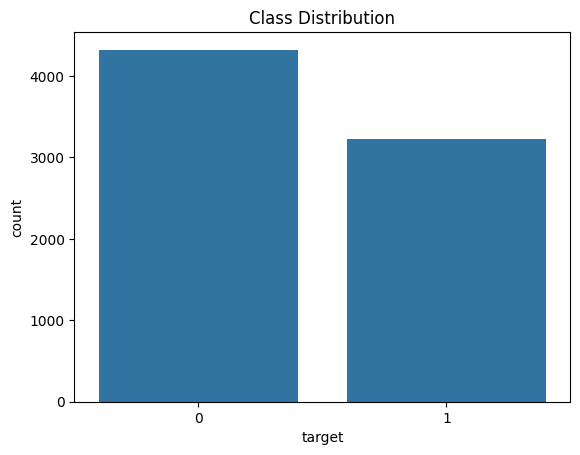

In [35]:
sns.countplot(x='target', data=train_data)
plt.title('Class Distribution')
plt.show()

USING WORD CLOUD FOR MOST OCCURING WORDS

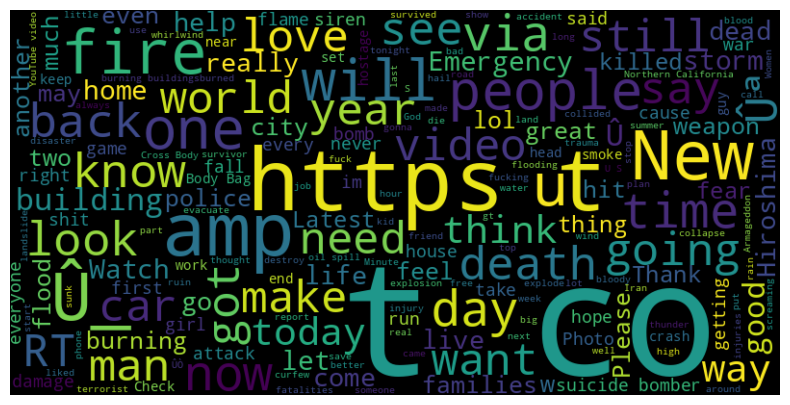

In [36]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(train_data['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

MAKING WORD CLOUD FOR DISASTER AND NON DISASTER TWEETS SEPERATELY

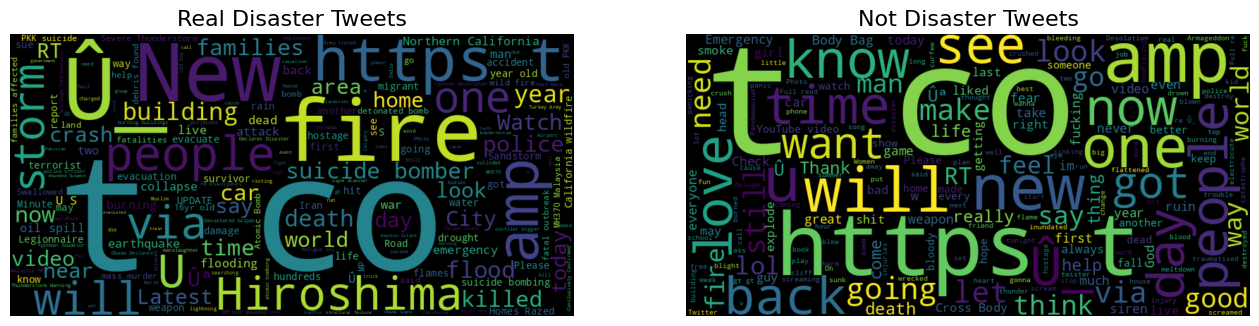

In [37]:
real_disaster_text = ' '.join(train_data[train_data['target'] == 1]['text'])
not_disaster_text = ' '.join(train_data[train_data['target'] == 0]['text'])

real_disaster_wordcloud = WordCloud(width=800, height=400,).generate(real_disaster_text)
not_disaster_wordcloud = WordCloud(width=800, height=400,).generate(not_disaster_text)


plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
plt.title('Real Disaster Tweets', fontsize=16)
plt.imshow(real_disaster_wordcloud, interpolation='bilinear')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.title('Not Disaster Tweets', fontsize=16)
plt.imshow(not_disaster_wordcloud, interpolation='bilinear')
plt.axis('off')


plt.show()

REMOVING SPECIAL CHARACTERS AND CONVERTING TO LOWERCASE

In [38]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

train_data['text'] = train_data['text'].map(clean_text)
train_data['location'] = train_data['location'].map(clean_text)
train_data['keyword'] = train_data['keyword'].map(clean_text)

REMOVING STOPWORDS USING NLTK LIBRARY

In [39]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

train_data['text'] = train_data['text'].map(remove_stopwords)
train_data['location'] = train_data['location'].map(remove_stopwords)
train_data['keyword'] = train_data['keyword'].map(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LEMMATIZING AND STEMTIZE WORDS

In [40]:
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(ps.stem(word)) for word in text.split()])

train_data['text'] = train_data['text'].map(stem_lemmatize)
train_data['location'] = train_data['location'].map(stem_lemmatize)
train_data['keyword'] = train_data['keyword'].map(stem_lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7552 entries, 31 to 7582
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7552 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  7552 non-null   object
 3   text      7552 non-null   object
 4   target    7552 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.0+ KB


VECTORIZING THE FEATURE USING SCIKIT LEARN TFDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
train_data['combined_text'] = train_data['text'] + ' ' + train_data['keyword'] + ' ' + train_data['location']
X_train = tfidf.fit_transform(train_data['combined_text'])


SPLITING INTO TRAIN AND VALIDATION SET

In [43]:
from sklearn.model_selection import train_test_split

X = X_train
y = train_data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


USING SVM MODEL FROM SCIKIT LEARN LIBRARY

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='linear', random_state=42)


svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_val)


print("SVM Classification Report:\n", classification_report(y_val, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       874
           1       0.80      0.72      0.76       637

    accuracy                           0.81      1511
   macro avg       0.81      0.80      0.80      1511
weighted avg       0.81      0.81      0.81      1511

SVM Accuracy: 0.8074123097286565


HYPERPARAMETER TUNNING USING GRIDSEARCH CV

In [47]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


best_svm_model = grid_search.best_estimator_


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   3.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   3.4s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   2.8s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   2.5s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   2.4s
[CV] END ...................C=0.1, gamma=auto, k

FIITING BEST FIT MODEL WITH DATA AND FINDING THE ACCURACY

In [56]:
best_svm_model.fit(X_train, y_train)


y_pred_svm = best_svm_model.predict(X_val)


print("SVM Classification Report:\n", classification_report(y_val, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       874
           1       0.83      0.69      0.76       637

    accuracy                           0.81      1511
   macro avg       0.82      0.80      0.80      1511
weighted avg       0.81      0.81      0.81      1511

SVM Accuracy: 0.8113831899404368
SVM Accuracy: 0.948352921701705


APPLING ALL THINGS ON TEST DATA AND OUTPUT THE RESULTS IN CSV FILE

In [49]:

test_data.fillna('unknown', inplace=True)

In [50]:
test_data['text'] = test_data['text'].map(clean_text)
test_data['location'] = test_data['location'].map(clean_text)
test_data['keyword'] = test_data['keyword'].map(clean_text)

In [51]:
test_data['text'] = test_data['text'].map(remove_stopwords)
test_data['location'] = test_data['location'].map(remove_stopwords)
test_data['keyword'] = test_data['keyword'].map(remove_stopwords)

In [52]:
test_data['text'] = test_data['text'].map(stem_lemmatize)
test_data['location'] = test_data['location'].map(stem_lemmatize)
test_data['keyword'] = test_data['keyword'].map(stem_lemmatize)

In [53]:
test_data['combined_text'] = test_data['text'] + ' ' + test_data['keyword'] + ' ' + test_data['location']

In [54]:
X_test = tfidf.transform(test_data['combined_text'])

In [55]:

test_predictions_svm = best_svm_model.predict(X_test)


submission_svm = pd.DataFrame({'id': test_data['id'], 'target': test_predictions_svm})
submission_svm.to_csv('svm_submission.csv', index=False)